# 가장 완벽한 모바일(아이폰) 천지인 키보드 찾기

- (출처) 유튜브 [빵형의 개발도상국](https://www.youtube.com/@bbanghyong)

- Reference: [Using AI to Create the Perfect Keyboard](https://www.youtube.com/watch?v=EOaPb9wrgDY)

In [11]:
import math
import json
import random
from jamo import h2j, j2hcj
from tqdm import tqdm
from pprint import pprint
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont


## 모바일(아이폰) 천지인 키보드

22


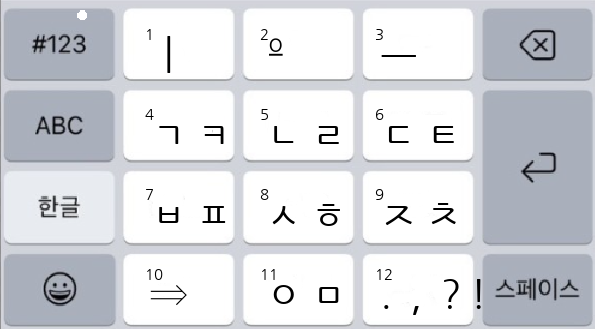

In [65]:

kb = 'ㅣºㅡㄱㅋㄴㄹㄷㅌㅂㅍㅅㅎㅈㅊ⇒ㅇㅁ.,?!'
print(len(kb))  # 22글자

with Image.open("template.jpg").convert("RGBA") as base:
    txt = Image.new("RGBA", base.size, (255, 255, 255, 0))

    fnt = ImageFont.truetype("NanumGothic.ttf", 40)
    fnt_index = ImageFont.truetype("NanumGothic.ttf", 15)
    d = ImageDraw.Draw(txt)

    # 각 텍스트의 위치 조정
    x_offsets = [150, 265, 380]
    y_start = 30
    x_spacing = 110
    y_spacing = 80

    text_index = 0
    for i in range(12):
        row = i % 3
        column = math.floor(i / 3)
        x = x_offsets[row]
        y = y_start + column * y_spacing

        if i == 9:  # 10번 인덱스에는 하나의 텍스트만 표시
            char_coords = (x, y)
            index_coords = (x - 5, y - 5)

            d.text(index_coords, str(i + 1), font=fnt_index, fill=(0, 0, 0, 255))
            d.text(char_coords, kb[text_index], font=fnt, fill=(0, 0, 0, 255))
            text_index += 1
        elif i >= 3 and i < 9 or i == 10:  # 4번부터 9번까지는 텍스트가 두 개씩 배치, 11번도 두 개 배치
            char_coords1 = (x, y)
            char_coords2 = (x + 45, y)  # 두 번째 텍스트는 오른쪽에 배치
            index_coords = (x - 5, y - 5)

            d.text(index_coords, str(i + 1), font=fnt_index, fill=(0, 0, 0, 255))
            d.text(char_coords1, kb[text_index], font=fnt, fill=(0, 0, 0, 255))
            if text_index + 1 < len(kb): 
                d.text(char_coords2, kb[text_index + 1], font=fnt, fill=(0, 0, 0, 255))
            text_index += 2 
        elif i == 11:  # 12번 인덱스에는 네 개의 텍스트가 나란히 표시
            char_coords1 = (x, y)
            char_coords2 = (x + 30, y)
            char_coords3 = (x + 60, y)
            char_coords4 = (x + 90, y)
            index_coords = (x - 5, y - 5)

            d.text(index_coords, str(i + 1), font=fnt_index, fill=(0, 0, 0, 255))
            d.text(char_coords1, kb[text_index], font=fnt, fill=(0, 0, 0, 255))
            if text_index + 1 < len(kb):
                d.text(char_coords2, kb[text_index + 1], font=fnt, fill=(0, 0, 0, 255))
            if text_index + 2 < len(kb):
                d.text(char_coords3, kb[text_index + 2], font=fnt, fill=(0, 0, 0, 255))
            if text_index + 3 < len(kb):
                d.text(char_coords4, kb[text_index + 3], font=fnt, fill=(0, 0, 0, 255))
            break
        else:  # 1번부터 3번까지는 텍스트가 하나씩 배치
            char_coords = (x, y)
            index_coords = (x - 5, y - 5)

            d.text(index_coords, str(i + 1), font=fnt_index, fill=(0, 0, 0, 255))
            d.text(char_coords, kb[text_index], font=fnt, fill=(0, 0, 0, 255))
            text_index += 1

    out = Image.alpha_composite(base, txt)
display(out)

## 키보드 좌표 초기 세팅

- ㅣ: 1
- º: 2
- ㅡ: 3
- ㄱ ㅋ ㄲ: 4
- ㄴ ㄹ: 5
- ㄷ ㅌ ㄸ:6
...

In [88]:


coords = {
    1: (0,0),  2: (2,0),  3: (4,0),
    4: (0,1),  5: (2,1),  6: (4,1),
    7: (0,2),  8: (2,2),  9: (4,2),
    10:(0,3),  11: (2,3), 12: (6,0)
}


## 두개의 키 사이 거리 계산

In [89]:

def distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# test
print(distance(coords[1], coords[3]))
print(distance(coords[1], coords[6]))

4.0
4.123105625617661


## 각 손가락으로 누를 수 있는 키 정의

In [90]:

#2개 손가락 사용

keys_per_finger = [[1, 2, 4, 5, 7, 10], [3, 6, 7, 8, 9, 11, 12]]


# distances 딕셔너리 초기화 (필요한 모든 키 포함)
distances = {i: {} for i in coords.keys()}

# 거리 계산 및 저장
for keys in keys_per_finger:
    for i in keys:
        for j in keys:
            distances[i][j] = distance(coords[i], coords[j]) / 2

print(distances)

{1: {1: 0.0, 2: 1.0, 4: 0.5, 5: 1.118033988749895, 7: 1.0, 10: 1.5}, 2: {1: 1.0, 2: 0.0, 4: 1.118033988749895, 5: 0.5, 7: 1.4142135623730951, 10: 1.8027756377319946}, 3: {3: 0.0, 6: 0.5, 7: 2.23606797749979, 8: 1.4142135623730951, 9: 1.0, 11: 1.8027756377319946, 12: 1.0}, 4: {1: 0.5, 2: 1.118033988749895, 4: 0.0, 5: 1.0, 7: 0.5, 10: 1.0}, 5: {1: 1.118033988749895, 2: 0.5, 4: 1.0, 5: 0.0, 7: 1.118033988749895, 10: 1.4142135623730951}, 6: {3: 0.5, 6: 0.0, 7: 2.0615528128088303, 8: 1.118033988749895, 9: 0.5, 11: 1.4142135623730951, 12: 1.118033988749895}, 7: {1: 1.0, 2: 1.4142135623730951, 4: 0.5, 5: 1.118033988749895, 7: 0.0, 10: 0.5, 3: 2.23606797749979, 6: 2.0615528128088303, 8: 1.0, 9: 2.0, 11: 1.118033988749895, 12: 3.1622776601683795}, 8: {3: 1.4142135623730951, 6: 1.118033988749895, 7: 1.0, 8: 0.0, 9: 1.0, 11: 0.5, 12: 2.23606797749979}, 9: {3: 1.0, 6: 0.5, 7: 2.0, 8: 1.0, 9: 0.0, 11: 1.118033988749895, 12: 1.4142135623730951}, 10: {1: 1.5, 2: 1.8027756377319946, 4: 1.0, 5: 1.41421

## 손가락의 초기 위치 설정

- 4: 왼손 엄지
- 6: 오른손 엄지

In [91]:


# 2개 손가락 사용
home_key_pos = [4, 6]

home_keys = {}
for i, keys in enumerate(keys_per_finger):
    for key in keys:
        home_keys[key] = home_key_pos[i]

home_keys

{1: 4, 2: 4, 4: 4, 5: 4, 7: 6, 10: 4, 3: 6, 6: 6, 8: 6, 9: 6, 11: 6, 12: 6}

## 유전자를 키보드 Dict로 반환하는 함수

- 한 키로 여러개의 자음을 변환 할 수 있으므로 한 키에 여러 자음 포함

In [104]:
kb = 'ㅣºㅡㄱㄴㄷㅂㅅㅈ⇒ㅇ.'

def genome_to_keyboard(genome):
    keyboard = {}
    for i, char in enumerate(genome):
        keyboard[char] = i+1
        
        if char == 'ㅂ':
            keyboard['ㅃ'] = i+1
            keyboard['ㅍ'] = i+1
        elif char == 'ㅈ':
            keyboard['ㅉ'] = i+1
            keyboard['ㅊ'] = i+1
        elif char == 'ㅇ':
            keyboard['ㅁ'] = i+1
        elif char == 'ㄷ':
            keyboard['ㄸ'] = i+1
            keyboard['ㅌ'] = i+1
        elif char == 'ㄱ':
            keyboard['ㄲ'] = i+1
            keyboard['ㅋ'] = i+1
        elif char == 'ㄴ':
            keyboard['ㄹ'] = i+1
        elif char == 'ㅅ':
            keyboard['ㅆ'] = i+1
            keyboard['ㅎ'] = i+1
        elif char == '.':
            keyboard[','] = i+1
            keyboard['?'] = i+1
            keyboard['!'] = i+1
    return keyboard

keyboard = genome_to_keyboard(kb)
print(keyboard)


{'ㅣ': 1, 'º': 2, 'ㅡ': 3, 'ㄱ': 4, 'ㄲ': 4, 'ㅋ': 4, 'ㄴ': 5, 'ㄹ': 5, 'ㄷ': 6, 'ㄸ': 6, 'ㅌ': 6, 'ㅂ': 7, 'ㅃ': 7, 'ㅍ': 7, 'ㅅ': 8, 'ㅆ': 8, 'ㅎ': 8, 'ㅈ': 9, 'ㅉ': 9, 'ㅊ': 9, '⇒': 10, 'ㅇ': 11, 'ㅁ': 11, '.': 12, ',': 12, '?': 12, '!': 12}


## 복합자음, 복합모음 분리
- 천지인 키보드에서는 ㅣ , º , ㅡ 의 조합으로 모든 모음을 만들어내므로 모음 전부를 쪼개어 인식할 수 있도록 만듦

In [94]:
j2hcj(h2j('값싼원두'))

'ㄱㅏㅄㅆㅏㄴㅇㅝㄴㄷㅜ'

In [95]:
def split_double_jamo(word):
    jamo = j2hcj(h2j(word))
    dic = {
        'ㅗ': ' º ㅡㅣ', 'ㅏ': 'ㅣ º', 'ㅐ': 'ㅣ º ºㅣ', 'ㅑ': 'ㅣ º º', 
        'ㅓ': ' ºㅣ', 'ㅔ': ' ºㅣㅣ', 'ㅕ': ' º ºㅣ', 'ㅛ': ' º º ㅡ',
        'ㅜ': 'ㅡ º', 'ㅠ': 'ㅡ º º', 'ㅡ': 'ㅡ', 'ㅣ': 'ㅣ',
        'ㅘ': ' ºㅡㅣ º', 'ㅙ': ' ºㅡㅣ ºㅣ', 'ㅚ': ' ºㅡㅣ', 
        'ㅝ': ' ºㅡ ºㅣ', 'ㅞ': ' ºㅡ ºㅣㅣ', 'ㅟ': ' ºㅡㅣ',
        'ㅢ': 'ㅡㅣ','ㅖ':'ººㅣㅣ','ㅒ':'ㅣººㅣ',
        'ㄳ': 'ㄱㅅ', 'ㄵ': 'ㄴㅈ', 'ㄶ': 'ㄴㅎ', 'ㄺ': 'ㄹㄱ',
        'ㄻ': 'ㄹㅁ', 'ㄼ': 'ㄹㅂ', 'ㄽ': 'ㄹㅅ', 'ㄾ': 'ㄹㅌ', 
        'ㄿ': 'ㄹㅍ', 'ㅀ': 'ㄹㅎ', 'ㅄ': 'ㅂㅅ'}

    for i in jamo:
        if i in dic.keys():
            jamo = jamo.replace(i,dic[i])
    return jamo

split_double_jamo('값싼원두')

'ㄱㅣ ºㅂㅅㅆㅣ ºㄴㅇ ºㅡ ºㅣㄴㄷㅡ º'

## 데이터 전처리

- 데이터셋: AI허브 [한국어 SNS](https://www.aihub.or.kr/aihubdata/data/view.do?dataSetSn=114)

In [51]:
import json
from tqdm import tqdm

JSON_FILE_PATH = r'C:\Users\JJongHwa\Desktop\쿼티 키보드\train\개인및관계.json'
DATA_LIMIT = 240_000

full_text = ''
# 허용할 글자들
legal_chars = 'ㅂㅃㅁㅋㅈㅉㄴㅌㄷㄸㅇㅊㄱㄲㄹㅍㅅㅆㅎㅠㅛㅗㅜㅕㅓㅡㅑㅏ,ㅐㅒㅣ.ㅔㅖ?!'

count = 0

# UTF-8 인코딩을 사용하여 파일 열기
with open(JSON_FILE_PATH, encoding='utf-8') as f:
    data = json.load(f)
    
    for d in tqdm(data['data']):
        if len(full_text) > DATA_LIMIT:
            break

        for body in d['body']:
            if body['utterance'].startswith('#@'): # 사진, 동영상 등 제거
                continue

            text = body['utterance'].replace('\n', ' ').strip()
            
            jamo_text = split_double_jamo(text)
            
            if any(char not in legal_chars for char in jamo_text): # 숫자, 영어 제거
                continue

            full_text += ' ' + jamo_text
            count += 1

print(count)
print(len(full_text))


  5%|▍         | 23302/511496 [00:19<06:53, 1180.81it/s]

27235
240052


In [96]:
print(full_text[:50])

 ㅇㅣㅇ ㅋㄱㄱㄱㅋ ㅎㅡㅁ ㅇㅡㅇㅇㅡㅇ ㅎㅡㅁ..ㅋㅋㅋㅋㅋㅋ ㅋㅋㅋㅋ ㅋㅋㅋㅋ .... ㅋ


In [97]:
def total_distance(input_string, keyboard):
    input_string = split_double_jamo(input_string.strip())
    input_string = input_string.replace(' ', '')

    first_char = input_string[0]
    first_pos = keyboard[first_char]
    first_home_key = home_keys[first_pos]
    total_dist = distances[first_home_key][first_pos]

    for i in range(0, len(input_string)-1):
        cur_char = input_string[i]
        next_char = input_string[i+1]
        cur_pos = keyboard[cur_char]
        next_pos = keyboard[next_char]

        if cur_pos in distances and next_pos in distances[cur_pos]:
            total_dist += distances[cur_pos][next_pos]
        else:
            home_key = home_keys[next_pos]
            total_dist += distances[home_key][next_pos]

    return total_dist

# test
total_distance('안녕하세요, 유전 알고리즘을 활용한 인공지능 과제입니다 ', genome_to_keyboard(kb))

76.68826646264263

In [98]:
total_distance(full_text, genome_to_keyboard(kb))

47947.38503398759

## 유전 알고리즘 구현

### 첫 세대 유전자 생성

In [105]:
def init_population(pop_size):
    #⇒ : 커서를 이동하는 화살표
    keyboard_chars = list('ㅣºㅡㄱㄴㄷㅂㅅㅈ⇒ㅇ.')
    population = []
    for i in range(pop_size):
        rand_gnome = keyboard_chars[:]
        random.shuffle(rand_gnome)
        population.append(rand_gnome)
    return population

test_genomes = init_population(2)

test_genomes

[['ㅂ', 'ㄱ', '⇒', 'ㅈ', 'ㅅ', 'ㅣ', 'ㄴ', 'ㅡ', 'ㅇ', '.', 'º', 'ㄷ'],
 ['ㄱ', 'ㄴ', '⇒', 'º', 'ㅇ', 'ㅅ', 'ㅡ', 'ㅂ', '.', 'ㅣ', 'ㄷ', 'ㅈ']]

## 두 개의 키보드를 결합
- Crossover
- Mutation

In [110]:
def mate(board1, board2, mutation_rate):
    keyboard_size = len(board1)
    idx = random.randint(0, keyboard_size-1)
    length = random.randint(0, keyboard_size-1)
    child = ['_' for i in range(keyboard_size)]

    for i in range(length):
        if idx > keyboard_size-1:
            idx = 0
        child[idx] = board1[idx]
        idx += 1

    child_idx = idx

    while '_' in child:
        if idx > keyboard_size-1:
            idx = 0
        if child_idx > keyboard_size-1:
            child_idx = 0
        char = board2[idx]
        if char in child:
            idx += 1
            continue
        child[child_idx] = board2[idx]
        child_idx += 1
        idx += 1
        
    prob = random.random()

    if prob < mutation_rate:
        point1 = random.randint(1, keyboard_size-1)
        point2 = random.randint(1, keyboard_size-1)
        allele1 = child[point1]
        allele2 = child[point2]
        child[point1] = allele2
        child[point2] = allele1
        
    return child

mate(test_genomes[0], test_genomes[1], 0.1)

['ㅂ', 'ㄱ', '⇒', 'ㅅ', 'ㅡ', 'ㅣ', 'ㅈ', 'ㄴ', 'ㅇ', '.', 'º', 'ㄷ']

## 현 세대 평가

Fitness 적합도 == Total distance

In [111]:
def get_evals(population):
    evals = {}

    for i, genome in enumerate(population):
        keyboard = genome_to_keyboard(genome)
        dist = total_distance(full_text, keyboard)
        evals[i] = dist

    sorted_evals = [k for k, v in sorted(evals.items(), key=lambda item: item[1])]

    return evals, sorted_evals

get_evals(test_genomes)

({0: 41505.70111056228, 1: 46107.395519420366}, [0, 1])

## 다음 세대 생성

In [112]:
def new_generation(population, sorted_evals, p_size, mutation_rate):
    new_gen = []
    sorted_population = []

    for i in sorted_evals:
        sorted_population.append(population[i])
        
    for i in range(int(p_size*0.1)):
        new_gen.append(sorted_population[i])

    for _ in range(int(p_size*0.9)):
        p1 = random.choice(sorted_population[:int(p_size*0.5)])
        p2 = random.choice(sorted_population[:int(p_size*0.5)])
        child = mate(p1, p2, mutation_rate)
        new_gen.append(child)
    
    return new_gen

new_generation(test_genomes, sorted_evals=[1, 0], p_size=10, mutation_rate=0.1)

[['ㄱ', 'ㄴ', '⇒', 'º', 'ㅇ', 'ㅅ', 'ㅡ', 'ㅂ', '.', 'ㅣ', 'ㄷ', 'ㅈ'],
 ['ㅂ', 'ㄱ', '⇒', 'ㅈ', 'ㅅ', 'ㅣ', 'ㄴ', 'ㅡ', 'ㅇ', '.', 'º', 'ㄷ'],
 ['ㄱ', 'ㄴ', '⇒', 'º', 'ㅇ', 'ㅅ', 'ㅡ', 'ㅂ', '.', 'ㅣ', 'ㄷ', 'ㅈ'],
 ['ㅈ', 'ㄴ', '⇒', 'º', 'ㅇ', 'ㅅ', 'ㅡ', 'ㅂ', '.', 'ㅣ', 'ㄷ', 'ㄱ'],
 ['ㅂ', 'ㄱ', '⇒', 'ㅈ', 'ㅅ', 'ㅣ', 'ㄴ', 'ㅡ', '.', 'ㅇ', 'º', 'ㄷ'],
 ['ㅂ', 'ㄱ', '⇒', 'ㅈ', 'ㅅ', 'ㅣ', 'ㄴ', 'ㅡ', 'ㅇ', '.', 'º', 'ㄷ'],
 ['ㄱ', 'ㄴ', '⇒', 'º', 'ㅇ', 'ㅅ', 'ㅡ', 'ㅂ', '.', 'ㅣ', 'ㄷ', 'ㅈ'],
 ['ㅂ', 'ㄴ', '⇒', 'ㅈ', 'ㅇ', 'ㅅ', 'ㅡ', '.', 'ㅣ', 'ㄱ', 'º', 'ㄷ'],
 ['ㄱ', 'ㄴ', '⇒', 'º', 'ㅇ', 'ㅣ', 'ㅡ', '.', 'ㅂ', 'ㅅ', 'ㄷ', 'ㅈ'],
 ['ㄱ', '⇒', 'ㅈ', 'ㄴ', 'ㅇ', 'ㅅ', 'ㅡ', 'ㅂ', '.', 'ㅣ', 'º', 'ㄷ']]

## 학습

In [113]:
P_SIZE = 100
GENERATIONS = 100
MUTATION_RATE = .1

learning = {
    'generations': {}
}

population = init_population(P_SIZE)

for i in range(GENERATIONS):    
    evals, sorted_evals = get_evals(population)
    sum_evals = 0

    for key in evals:
        sum_evals += evals[key]

    avg_evals = sum_evals/P_SIZE
    learning['generations'][i] = {
        'population': population,
        'best': population[sorted_evals[0]],
        'min': evals[sorted_evals[0]],
        'avg': avg_evals
    }

    print('GEN: {}, AVG: {}, MIN: {}, BEST: {}'.format(i+1, avg_evals, evals[sorted_evals[0]], population[sorted_evals[0]]))
    
    population = new_generation(population, sorted_evals, P_SIZE, MUTATION_RATE)

with open('learning.json', 'w') as fp:
    json.dump(learning, fp)

GEN: 1, AVG: 48166.86447373405, MIN: 31359.62085445463, BEST: ['ㅣ', '.', 'ㄱ', 'ㅡ', 'ㅈ', 'ㅇ', 'ㄴ', 'º', 'ㄷ', '⇒', 'ㅅ', 'ㅂ']
GEN: 2, AVG: 42855.97755814663, MIN: 26167.43469308433, BEST: ['ㅣ', '.', 'ㄱ', 'ㅡ', 'ㅈ', 'ㅇ', 'ㄴ', 'º', 'ㅅ', '⇒', 'ㅂ', 'ㄷ']
GEN: 3, AVG: 39108.42100213203, MIN: 25843.153731120838, BEST: ['ㅣ', 'ㅈ', 'ㄱ', 'ㅡ', '.', 'ㅇ', 'ㄴ', 'º', 'ㅅ', '⇒', 'ㅂ', 'ㄷ']
GEN: 4, AVG: 37152.77688565806, MIN: 25843.153731120838, BEST: ['ㅣ', 'ㅈ', 'ㄱ', 'ㅡ', '.', 'ㅇ', 'ㄴ', 'º', 'ㅅ', '⇒', 'ㅂ', 'ㄷ']
GEN: 5, AVG: 36759.41748597104, MIN: 25843.153731120838, BEST: ['ㅣ', 'ㅈ', 'ㄱ', 'ㅡ', '.', 'ㅇ', 'ㄴ', 'º', 'ㅅ', '⇒', 'ㅂ', 'ㄷ']
GEN: 6, AVG: 35620.32886886815, MIN: 25843.153731120838, BEST: ['ㅣ', 'ㅈ', 'ㄱ', 'ㅡ', '.', 'ㅇ', 'ㄴ', 'º', 'ㅅ', '⇒', 'ㅂ', 'ㄷ']
GEN: 7, AVG: 34257.92428712721, MIN: 25843.153731120838, BEST: ['ㅣ', 'ㅈ', 'ㄱ', 'ㅡ', '.', 'ㅇ', 'ㄴ', 'º', 'ㅅ', '⇒', 'ㅂ', 'ㄷ']
GEN: 8, AVG: 33389.14950864238, MIN: 25168.50429975249, BEST: ['ㅡ', 'ㅈ', 'ㄱ', 'ㅣ', '.', 'ㅇ', '⇒', 'ㅂ', 'ㅅ', 'ㄴ', 'º', 'ㄷ']
GEN: 9, AVG

## 학습 결과 시각화

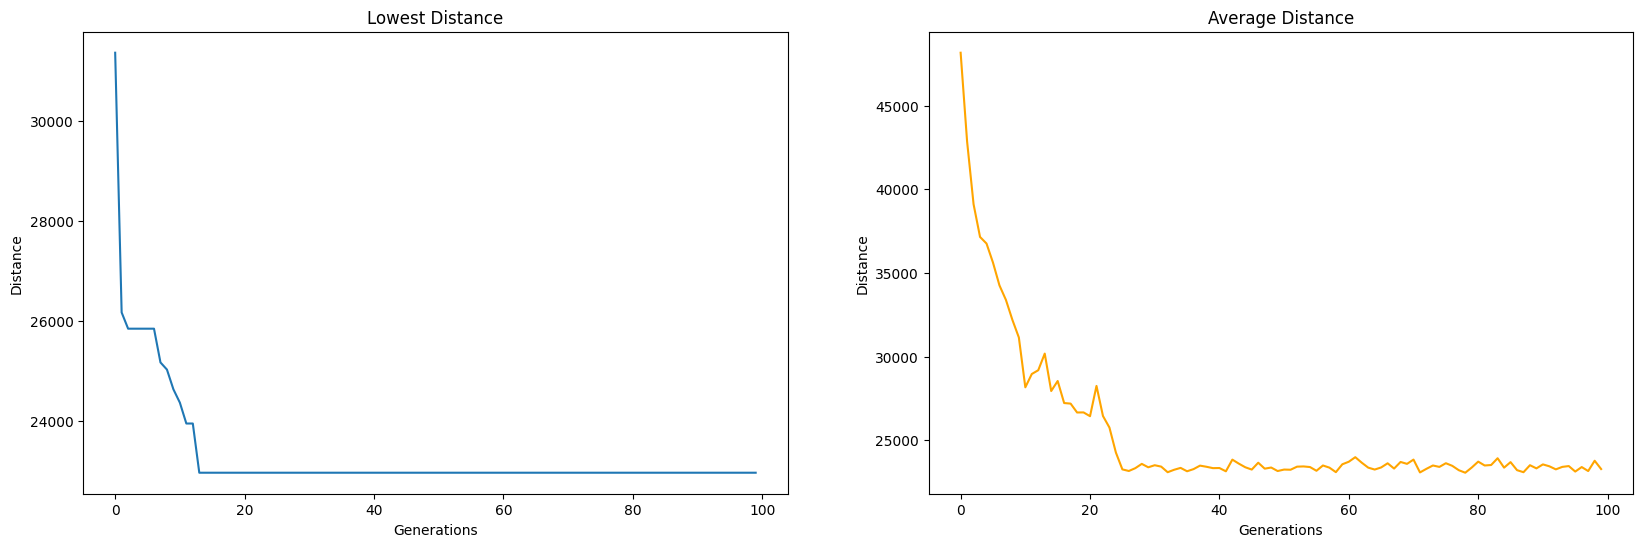

In [67]:
with open('learning.json') as fp:
    learning = json.load(fp)
    
last_dist = 1000000000
min_dists = []
avg_dists = []
generations = len(learning['generations'])

for i in range(0, generations):
    min_dist = learning['generations'][str(i)]['min']
    avg_dist = learning['generations'][str(i)]['avg']
    min_dists.append(min_dist)
    avg_dists.append(avg_dist)
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].plot(min_dists, label='Lowest Distance')
axes[0].set_xlabel('Generations')
axes[0].set_ylabel('Distance')
axes[0].set_title('Lowest Distance')

axes[1].plot(avg_dists, label='Average Distance', color='orange')
axes[1].set_xlabel('Generations')
axes[1].set_ylabel('Distance')
axes[1].set_title('Average Distance')

plt.show()

## 가장 효율적인 키보드

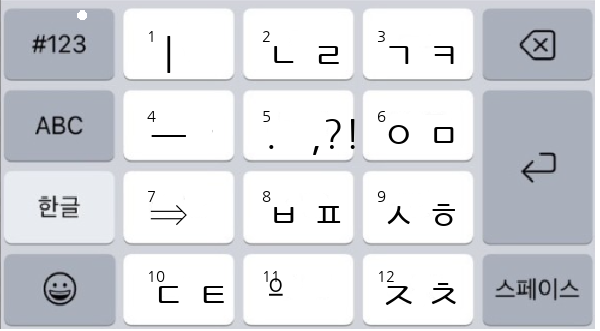

In [83]:
kb = learning['generations'][str(generations-1)]['best']

with Image.open("template.jpg").convert("RGBA") as base:
    txt = Image.new("RGBA", base.size, (255, 255, 255, 0))

    fnt = ImageFont.truetype("NanumGothic.ttf", 40)
    fnt_index = ImageFont.truetype("NanumGothic.ttf", 15)
    d = ImageDraw.Draw(txt)
    
    # 각 텍스트의 위치 조정
    x_offsets = [150, 265, 380]  # 3개의 열에 맞춰 설정
    y_start = 30
    y_spacing = 80  # 행 간격

    # 추가 텍스트 정의
    additional_text = {
        'ㄱ': 'ㅋ', 'ㄴ': 'ㄹ', 'ㄷ': 'ㅌ', 'ㅂ': 'ㅍ', 'ㅅ': 'ㅎ', 'ㅈ': 'ㅊ', 'ㅇ': 'ㅁ', '.':',?!'
    }

    text_index = 0
    for i in range(12):
        row = i % 3
        column = math.floor(i / 3)
        x = x_offsets[row]
        y = y_start + column * y_spacing
        char_coords = (x, y)
        index_coords = (x - 3, y - 3)

        d.text(index_coords, str(i + 1), font=fnt_index, fill=(0, 0, 0, 255))

        # kb 리스트의 텍스트를 먼저 배치
        if text_index < len(kb):
            d.text(char_coords, kb[text_index], font=fnt, fill=(0, 0, 0, 255))
            if kb[text_index] in additional_text:
                extra_char = additional_text[kb[text_index]]
                d.text((x + 45, y), extra_char, font=fnt, fill=(0, 0, 0, 255))
            text_index += 1
        else:
            # kb 리스트를 다 채운 이후에 특정 텍스트를 추가
            additional_text_index = text_index - len(kb)
            additional_chars = list(additional_text.values())
            if additional_text_index < len(additional_chars):
                d.text(char_coords, additional_chars[additional_text_index], font=fnt, fill=(0, 0, 0, 255))
            text_index += 1

    out = Image.alpha_composite(base, txt)
    display(out)